# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

In this research, the dataset we select is from Kaggle that collects personal information from people in the data science and machine learning industries. We are going to explore the relationships between salary and gender, resident country, and the number of programming languages, respectively. For resident country, we are only interested in the top six countries that have the highest number of responses in the whole dataset.

# Names

- Bochen Pan
- Ruijie Huang
- Xiangwen Li
- Rongyu Ma
- Mingjie Ni

<a id='research_question'></a>
# Research Question

- Is there a correlation between data scientists' salaries, from Kaggle's research, and gender?
- Is there a correlation between data scientists' salaries, from Kaggle's research, and the top 6 countries they reside?
- Is there a correlation between data scientists' salaries, from Kaggle's research, and the numbers of programming languages they used?

<a id='background'></a>

## Background & Prior Work

This project is interested in exploring the factors that predict the salary earned in the data science field. We would use the data from Kaggle’s research to explore the question. More specifically, we are interested in looking for the associations between data scientist salary and gender, country, and the numbers of programming languages the person used, respectively. 

Data Science is an interdisciplinary field that has been receiving significantly increasing attention in recent years. According to the 2015 data science salary survey, the median annual base income is $91,000. The U.S has the top median salary in the data science industry, which is $104,000. In addition, according to the April 2014 Salary Survey, the median salaries in the related fields such as Math and Science, Computer Science, and Engineering, are corresponding to $41,563, $58,791, and $60,167. It is noticed that a PhD earning degree could bring $7,500 to people in the data science industry each year. 
The great earnings of this job provide millions of probabilities for various people. However, some researches showed that gender imbalance is common in the Data Science field, even in the whole STEM field. The imbalanced job opportunities might also influenced people’s salary earns. According to a study done by Boston Consulting Group, in 2020, only 15% to 20% Data Scientists are women. 

According to an article in Data Science field Which Countries Pay The Most To Data Scientists , the group explored the median salary for Data Scientist in different countries and concluded that Data Scientists in Denmark have the highest salary. Top 10 countries are Denmark, Switzerland, Australia, Belgium, USA, Israel, Italy, Singapore, UK & Norway. It indicates that countries could be a predictor of one’s salary. 

Furthermore, working experience is also a significant indicator of one’s income. More specifically, with both working experience and one’s income measured in terms of years, we could quantitatively measure and compare the working experiences in terms of their contribution to one’s earnings. From the “regression results for the U.S. in 2015”, Stock et al. show that working experience are statistically significant indicators of one’s income at 5% level. Their findings reveal that the effect of working experience is associated with approximately 1/10 higher hourly earnings. In this study, we will use the number of programming languages that the person's experience counts as working experience. 

References (include links):
1) “8.3: The Return to Education, Regression Results for the U.S. in 2015.” Introduction to Econometrics, by James H. Stock and Mark W. Watson, 4th ed., Pearson Education Limited, 2020, pp. 263–264.
2) John King & Roger Magoulas. “2015 Data Science Salary Survey” 2 Sep.2015, pp.11-15 http://www.eli.sdsu.edu/courses/fall16/cs696/2015-data-science-salary-survey.pdf
3)Muriel Kosaka Gender Imbalance in Data Sciencehttps://medium.com/swlh/gender-imbalance-in-data-science-3a7183e6f877
4)Which Countries Pay The Most To Data Scientists https://analyticsindiamag.com/which-countries-pay-the-most-to-data-scientists/
5)GDP of each country https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?locations=US

# Hypothesis


Our hypothesis is that the gender, country of residence and number of programming languages of data scientists are correlated with salaries from Kaggle's research. Specifically, we believe that male data scientists would have more salaries than female. Moreover, data scientists from the U.S. will earn the most salaries. There is also a positive relationship between how many programming languages data scientists know and salaries they earn. 

Data scientists' salaries, from Kaggle's research, correlated with gender, region or number of programming languages used.

1)  H0 (null hypothesis): The difference in gender compared to salary in data scientists is due to chance. H1 (alternative hypothsis): The difference in gender compared to salary in data scientists is not due to chance. There is significance between gender and salaries.
2) H0 (null hypothesis): The difference in top 6 countries of residence compared to salary in data scientists is due to chance. H1 (alternative hypothsis): The difference in top 6 countries of residence compared to salary in data scientists is not due to chance. There is significance between 6 countries and salaries.
3) H0 (null hypothesis): The difference between data scientists’ salaries compared to the number of programming languages they used is due to chance alone. H1 (alternative hypothsis): The difference between data scientists’ salaries compared to the number of programming languages they used is not due to chance alone.

# Dataset(s)

* Dataset Name: kaggle_survey_2020_responses.csv
* Link to the dataset: https://www.kaggle.com/c/kaggle-survey-2020/data
* Description: Annual industry-wide survey that presents a comprehensive view of the state of data science and machine learning.
* Variables relevant to our project: Salaries, gender, countries of residence, programming languages
* Size/ number of Observation: 20037 rows and 355 columns


During our research process, we find the research from Kaggle Community as one of the surveys that are large and balanced enough to be representative of the salaries of data scientists. This data set is collected by Kaggle through a survey posted on its website for three weeks and is public on its website. 

# Setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import sklearn.neighbors as skn
import sklearn.metrics as skm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import statsmodels.api as sm
import patsy
from statsmodels.formula.api import ols

# Data Cleaning

The data is not very clean. Although the observations are formatted in the columns, the rows are summarized as the number of survey questions. In addition, the survey questions are put into the second row, which are not summarized as variables that can describe the survey questions and should be put into the first row. Furthermore, many answers of one survey question are separated into multiple columns, where one column records only one answer for a group of participants. For the survey questions we are interested in, some answers are missing or cannot be included in the analysis. For example, in the gender question, the answer of preferred not to say does not relate to our research question. The answers of the salary category are recorded within a range. In order to analyse, a mean of each answer should be calculated. 

Our original data contains 355 variables where only 18 were relevant to our research questions. Thus, to transform the data into a usable format, the first thing we’ve done was to select the 18 relevant variables into a new dataframe called dat. The 18 variables included columns corresponds to  age, gender, reside country, current role, year of coding, programming language used(including 12 variables), salary. Then, we deleted the the survey questions because it is not necessary for our purpose. Next, we change the first columns for all data from Qs to corresponding variable names: Age, Gender, Country, Current_Role, Year_of_coding, Programming_language, and salary. 

Change type:
1. Age: since it’s in range, we take the median of each age (change to numerical)
2. Gender: delete prefer not to say, then groupby (categorical)
3. Country: no change (categorical), omit Na
4. Current role: no change (categorical)
5. Year of coding: numerical
6. Programming language: no change (categorical)
7. Salary: numerical (omit na)

Then we performed some data cleaning on the 18 relevant variables. Since the Age column has interval values instead of integers (in order to protect personal privacy), we took the median of each interval to make it easier for future data wrangling and analysis. Doing so changes the original categorical data to numerical. For the Gender column, besides “Women” ,“Men” and "Nonbinary", there are “Prefer not to say” or “Prefer to self-describe” values. We chose to drop the rows with a value of “Prefer not to say” or “Prefer to self-describe” in the Gender column for consistency. As for the Country, Current role, Year of coding, and Programming language columns, we didn’t make any changes since the data is clean and ready to use. Lastly, we dropped all rows with NaN values in the Salary column. Also, we convert each language name/ NaN in each programming language column to True/False. And now our data is in a usable format.

For the purpose of personal privacy, numerical results in the research result are all recorded as intervals, which is not a suitable format for regression analysis. Therefore, the distribution of yearly compensation in different groups( gender/ the countries that data scientists reside in) will be listed below. For the purpose of regression analysis, middle values of each interval are calculated to replace the range in our analysis. 

In [2]:
# read the data
fp = os.path.join('kaggle-survey-2020', 'kaggle_survey_2020_responses.csv')
data = pd.read_csv(fp)
# select columns for our study, drop first rows and change column names to readable names
new = data.drop(data.index[[0]])
lis = list(new.filter(regex='Q7').columns)
lis1 = ['Q1','Q2','Q3','Q4','Q5','Q6']
lis1.extend(lis)
lis1.append('Q24')
use_data = new[lis1]
use_data = use_data.rename({'Q1':'age', 'Q2':'gender', 'Q3':'country', 'Q4':'education', 
                            'Q5':'role', 'Q6':'year_of_coding', 'Q7_Part_1':'Python', 
                            'Q7_Part_2':'R', 'Q7_Part_3':'SQL', 'Q7_Part_4':'C', 'Q7_Part_5':'C++', 
                            'Q7_Part_6':'Java', 'Q7_Part_7':'Javascript', 'Q7_Part_8':'Julia', 
                            'Q7_Part_9':'Swift', 'Q7_Part_10':'Bash', 'Q7_Part_11':'MATLAB', 
                            'Q7_Part_12':'None', 'Q7_OTHER':'Other','Q24':'salary' }, axis='columns')

# drop rows with gender Prefer not to say or Prefer to self-describe
use_data = use_data[(use_data['gender'] == 'Woman' )| (use_data['gender'] == 'Man') | 
                    (use_data['gender'] == 'Nonbinary')]

# convert the age column from range into median of the range
def change_int(lst):
    return [int(i) for i in lst]
temp = use_data['age'].str.replace('+', '', regex = True)
age = temp.str.split('-')
age = age.apply(change_int)
age = age.apply(np.mean)
use_data['age'] = age

# drop people whose salary is NaN and convert the salary range into mean of the range of salary 
use_data = use_data[use_data['salary'].notna()].reset_index(drop = True)
salary = use_data['salary'].str.replace('>', '', regex=True)
salary = salary.str.replace(',', '', regex=True)
salary = salary.str.replace('$', '', regex=True)
salary = salary.str.split('-')
salary = salary.apply(change_int)
salary = salary.apply(np.mean)
use_data['salary'] = salary

# create a new column as language count to get count of programming languages
languages = use_data[['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB']]
na_num = languages.isna().sum(axis=1)
use_data['language_count'] = [(11 - value) for value in na_num]
use_data = use_data.reset_index(drop = True)

# programming language change to True/False
languages = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']
for language in languages:
    use_data.loc[use_data[language] != language, language] = False
    use_data.loc[use_data[language] == language, language] = True

# clean data   
use_data.head()

/Users/panbochen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,gender,country,education,role,year_of_coding,Python,R,SQL,C,...,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other,salary,language_count
0,32.0,Man,United States of America,Master’s degree,Data Engineer,5-10 years,True,True,True,False,...,False,False,False,False,False,False,False,False,112499.5,3
1,37.0,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,False,False,False,False,...,True,True,False,False,True,False,False,False,17499.5,3
2,32.0,Man,United States of America,Master’s degree,Data Scientist,5-10 years,True,False,True,False,...,False,False,False,False,True,False,False,False,137499.5,3
3,37.0,Man,Germany,Doctoral degree,Data Scientist,5-10 years,True,False,True,False,...,False,False,False,False,True,False,False,False,74999.5,3
4,37.0,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,False,True,False,False,...,False,False,False,False,False,False,False,False,34999.5,1


# Data Analysis & Results

### 1. salary

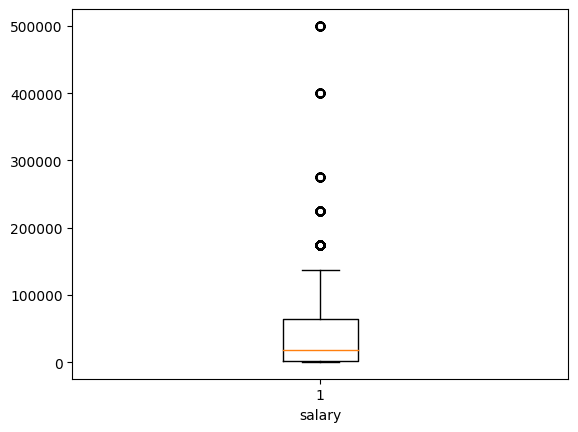

<Figure size 640x480 with 0 Axes>

In [3]:
#visualize the salary using boxplot
plt.boxplot(use_data['salary'])
plt.xlabel('salary')
fig = plt.figure()
plt.show()

In [4]:
#value count the number of salaries in different amounts
count = use_data['salary'].value_counts()
print(count)

499.5       2093
12499.5      658
1499.5       575
112499.5     563
44999.5      542
34999.5      536
54999.5      501
6249.5       483
17499.5      445
64999.5      403
22499.5      402
74999.5      388
8749.5       366
174999.5     341
2499.5       323
137499.5     312
27499.5      308
4499.5       277
94999.5      275
84999.5      265
3499.5       259
224999.5     112
400000.0      54
274999.5      47
500000.0      47
Name: salary, dtype: int64


Based on the boxplot of salary, we can see that the salaries that are 160249.5 dollars and above are outlier because those dots do not belong to the box. They are interpreted as the salaries that are above 75% over the whole salary amount. There are 615 outliers that the participants' salary can affect the model prediction. 

### 2. Salary VS Gender

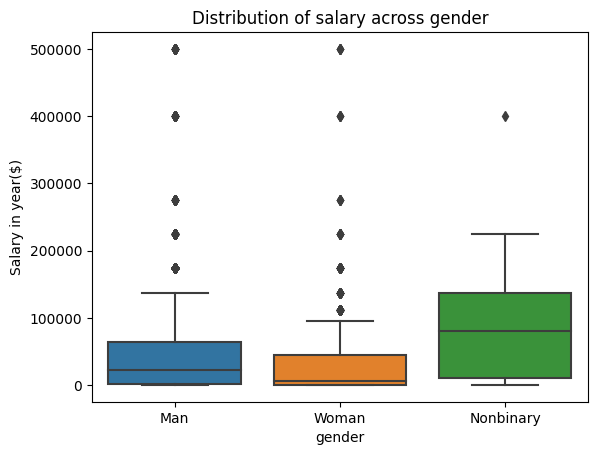

In [5]:
gender_plot = sns.boxplot(x='gender', y = 'salary', data = use_data)
gender_plot.set(title='Distribution of salary across gender', ylabel = 'Salary in year($)')
plt.show()

#### 2.1 Explanation & Outliers 

We choose the boxplot over scatterplot because boxplot provides a clearer comparison between different genders. The boxplot indicates that people with nonbinary gender has the highest median salary, and female data scientists have the lowest median salary. One factor might affects nonbinary people’s salary is its small sample size relative to the other genders. Out of 10685 people who took the survey, only 20 people reported as nonbinary gender. When comparing male and female workers’ salaries, it shows that male workers are paid more than females. The max paid salary of female workers is lower than the max salary in males.  One reason that women’s salary is on average lower than men’s salary is also the difference in sample size. Out of all people who reported the gender, 1683 were female while 8872 were male. It shows that on average there are less women working in the field of data science. Another reason for females' low salary might be the unfairness in the field. Male in the STEM field are usually paid more than female workers even though they are given a similar amount of work. 


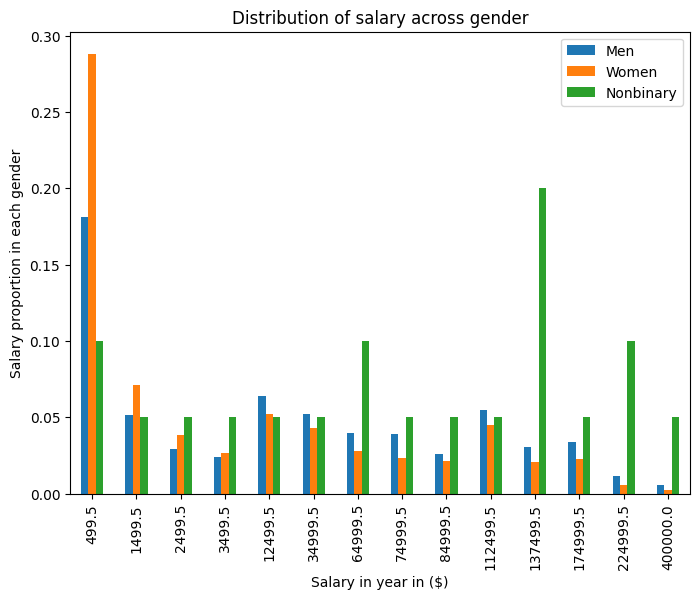

In [6]:
# Visualize salary broken up by gender
men = use_data[use_data['gender'] == 'Man']
a = men['salary'].value_counts()/len(men['salary'])
a = pd.DataFrame(a).reset_index()
a.columns = ['Salary','Men']
women = use_data[use_data['gender'] == 'Woman']
b = women['salary'].value_counts()/len(women['salary'])
b = pd.DataFrame(b).reset_index()
b.columns = ['Salary','Women']
new = pd.merge(a,b, on = 'Salary')
nonbinary = use_data[use_data['gender'] == 'Nonbinary']
c = nonbinary['salary'].value_counts()/len(nonbinary['salary'])
c = pd.DataFrame(c).reset_index()
c.columns = ['Salary','Nonbinary']
result = pd.merge(new,c, on = 'Salary')
result = result.sort_values(by = ['Salary']).reset_index(drop = True)
result.plot(x="Salary", y=["Men", "Women", "Nonbinary"], title='Distribution of salary across gender', xlabel = 'Salary in year in ($)',ylabel = 'Salary proportion in each gender', kind="bar",figsize=(8,6))
plt.show()

In [7]:
# Does gender predict salary? 
model = ols('salary ~ gender', data=use_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
gender,3.145278e+11,2.0,37.525083,5.762845e-17
Residual,4.430620e+13,10572.0,NaN,NaN


In [8]:
outcome, predictors = patsy.dmatrices('salary ~ gender', data = use_data)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     37.53
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           5.76e-17
Time:                        14:56:33   Log-Likelihood:            -1.3215e+05
No. Observations:               10575   AIC:                         2.643e+05
Df Residuals:                   10572   BIC:                         2.643e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             4.63e+04    

#### 2.2 Conclusion

We reject the null hypothesis stating that the difference in gender compared to salary in data scientists is due to chance. The difference in gender is significant (p < 0.01).  The result indicated that gender is a factor in determining the salary of data scientist. 
The OLS regression model indicates that when controlled by other variables, the salary for men is 4.63e+04 dollars. When the data scientists’ gender are nonbinary, their salary raised by 5.538e+04 compared to men. When the data scientist’s gender are woman, their salary decreased by 1.326e+04 compared to men.  

Since the sample size across gender was not even, we then used a proportion graph to show a better interpretation of gender difference in salary. The total salary in this study was in a range between $500 to $400000 a year. We separated the salary into 14 situations, and analyzed the proportion of each gender’s salary earned in each situation. The graph indicated that most female data scientists (about 30%) had the lowest salary ($500), while only about 18% male data scientists had the lowest salary. When comparing the proportion of the highest salary, it shows that more male data scientists gained a higher salary than females. The graph also shows that as salary increases, the proportion of men becomes larger than the proportion of women. It might be because a higher position with a higher salary favored male data scientists than females. And it might be that females are involved more in the entry level and low-paid jobs in the field of data science. 



### 3. Salary VS Countries

In [9]:
# we can see that there are big differences for counts of countries where people are from
country_count = use_data['country'].value_counts()
country_count

India                                                   2325
United States of America                                1451
Other                                                    798
Brazil                                                   443
Japan                                                    381
Russia                                                   347
United Kingdom of Great Britain and Northern Ireland     344
Germany                                                  248
Nigeria                                                  246
Spain                                                    232
Canada                                                   196
France                                                   193
Italy                                                    182
Turkey                                                   163
China                                                    162
Australia                                                140
Mexico                  

From the above count, it is clear that geographical disribution of responses are highly condensed
in a few countries. For countries that responses are limited, their answer may not be representative. 
Therefore, we decide to first look at the top 10 countries.

In [10]:
print(country_count[:10])

India                                                   2325
United States of America                                1451
Other                                                    798
Brazil                                                   443
Japan                                                    381
Russia                                                   347
United Kingdom of Great Britain and Northern Ireland     344
Germany                                                  248
Nigeria                                                  246
Spain                                                    232
Name: country, dtype: int64


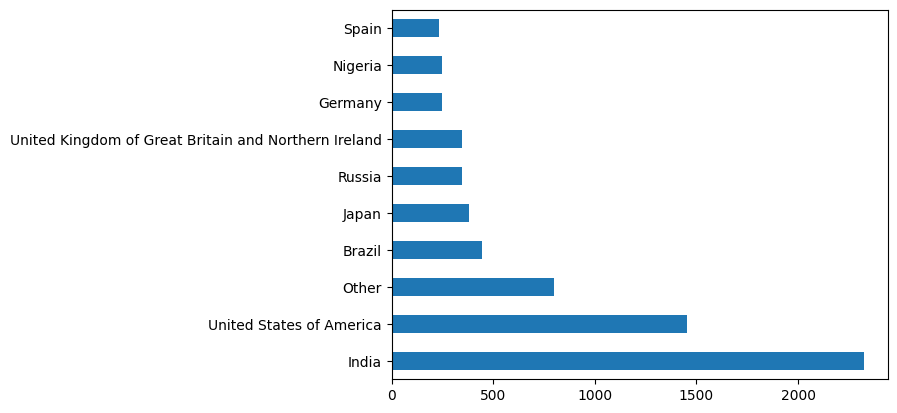

In [11]:
# plot of most 10 countries
country_count[:10].plot(kind='barh')
plt.show()

In [12]:
# We narrow down our focus to these six countries.
country_list=['India','United States of America','Brazil','Japan',
              'Russia','United Kingdom of Great Britain and Northern Ireland']
india=use_data[use_data['country'] == 'India'].sample(300)
usa=use_data[use_data['country'] == 'United States of America'].sample(300)
brazil=use_data[use_data['country'] == 'Brazil'].sample(300)
japan=use_data[use_data['country'] == 'Japan'].sample(300)
russia=use_data[use_data['country'] == 'Russia'].sample(300)
uk=use_data[use_data['country'] == 'United Kingdom of Great Britain and Northern Ireland'].sample(300)
country_ = pd.concat([india, usa, brazil, japan, russia, uk], axis = 0).reset_index(drop = True)

#### 3.1 Explanation
From the plot above, there are apparently more responses from the top six countries, India and United States, 
Brazil, Japan, Russia and United Kingdom of Great Britain and Northern Ireland (number of responses>300). While the number of responses from each countries we chose varies from 2325 to 344, if analsis is conducted upon the general data, our analysis may be affected by countries that contains more responses, for example, India. Therefore, a random sample of 300 responses from each top 6 country is chosen to for the purpose of our analysis (anova) later as country_. Though we have cleaned the dataset in purpose of anova test in countries, statistics of individual data here are calculated and analzed using the original dataset since skewness in some countries will have no effects on other countries statistical values. So we pick country_data as which has top 6 countries in the 'country' column no matter how many)

In [13]:
country_data = use_data[use_data['country'].isin(country_list)].reset_index(drop = True)
country_data['country'] =  country_data['country'].str.replace('United States of America', 'USA')
country_data['country'] =  country_data['country'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
# Take a look at the statistics of salary in these countries：
print(country_data.groupby('country')['salary'].describe())

          count           mean           std    min      25%       50%  \
country                                                                  
Brazil    443.0   22765.867946  41134.822702  499.5   2499.5   12499.5   
India    2325.0   18136.599140  41365.880046  499.5    499.5    6249.5   
Japan     381.0   47005.406824  44713.849768  499.5   4499.5   44999.5   
Russia    347.0   20935.380403  34343.208467  499.5   1499.5   12499.5   
UK        344.0   82733.523256  78469.248497  499.5  42499.5   64999.5   
USA      1451.0  120288.110613  84469.077141  499.5  74999.5  112499.5   

              75%       max  
country                      
Brazil    27499.5  500000.0  
India     17499.5  500000.0  
Japan     74999.5  400000.0  
Russia    27499.5  400000.0  
UK       112499.5  500000.0  
USA      174999.5  500000.0  


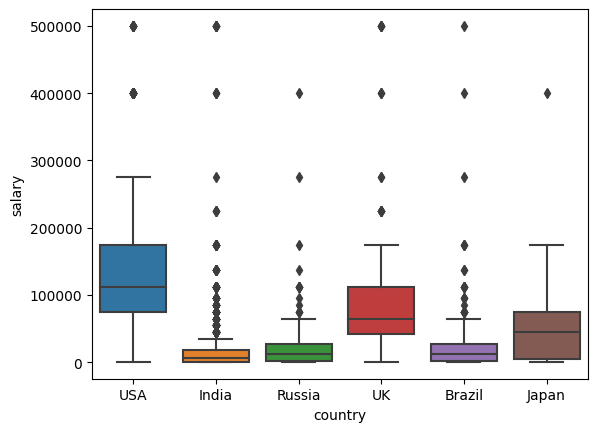

In [14]:
# Use a boxplot to check the distribution of salary in each country:
sns.boxplot(x='country', y='salary', data= country_data)
plt.show()

#### 3.2 Outliers

From the plot, it is obvious that the United States, UK, and Japan are among the countries that offer the highest average salary while salaries in the other 3 countries are much lower. Salaries in the United States also have the highest 75 quantile while in Japan and UK the quantile is similar. 75 quantile in India is the lowest while in Brazil, and Russia is similar. Based on the boxplot, the outliers in the boxplot depend on which country is referred to. For the United States of America, the outliers are at the range between 400000 and 500000. For the United Kingdoms, the outliers are about above 50000. For Russia, the outliers start from a little bit below 100000. For India, the outliers start from the point that is slightly below 200000. For Brazil, the starter outliers are similar to the range of Russia. For Japan, the outliers are fewer, located at about 400000. They are outliers because they are not located inside the box. The existence of such outliers are common because there may be experts in each country whose salaries are not close to the average level.

In [15]:
# Does top 6 countries predict salary? 
outcome_country, predictors_country = patsy.dmatrices("country_['salary'] ~ country", country_)
mod_country = sm.OLS(outcome_country, predictors_country)
res_country = mod_country.fit()
# Print out the results 
print(res_country.summary())

                            OLS Regression Results                            
Dep. Variable:     country_['salary']   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     154.0
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          2.42e-136
Time:                        14:56:34   Log-Likelihood:                -22349.
No. Observations:                1800   AIC:                         4.471e+04
Df Residuals:                    1794   BIC:                         4.474e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [16]:
model = ols('salary ~ country', data = country_).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
country,2.755682e+12,5.0,154.026152,2.420924e-136
Residual,6.419292e+12,1794.0,NaN,NaN


#### 3.3 Conclusion

We can state that we reject the null hypothesis that the difference in top 6 countries of residence compared to salary in data scientists is due to chance. We found out that in some countries the effect of countries on salaries are significant. For example, we can say that for Japan, USA and UK, the difference in countries plays an important role in salaries because their p-values are smaller than 0.01. But for India and Russia, those countries don't much significance since their p-values are larger than 0.01. 

From the 5th reference about GDP of each country, we can see that GDP 2020 per capita in ($): USA: 63,543.6, India: 1,900.7, Russia:10,126.7 , UK: 40,284.6, Brazil: 6,796.8, Japan: 39,538.9. From the website showing GDP per capita, we can see that the USA, UK, Japan, Russia,Brazil and India have their GDP per capita in a decreasing order. USA, UK and Japan, acknowledged as developed countries internationally, have higher GDP per capita and developed market. Higher GDP per capita, resulting from stronger national production level, will help build a more developed and stable economy, providing foundations for technic innovations and encouraging higher consumption which brings positive inflows to the economy. Though GDP per capita is not equivalent to income level, it is a reasonable indicator of the national level of income and consumption. Thus, by comparison, we can see that the USA, the largest economy in the world with highest GDP per capita offers the highest average and 75 quantile salaries. While the UK and Japan, which are traditional developed countries that do not have highly developed technology related industries, offer comparably higher salaries than developing countries. The salaries in Brazil and Russia are similar following the same principle between UK and Japan except that Brazil and Russia are developing countries that offer lower average salaries. India, however, offers the lowest average and 75 quantile salaries because of its cheap labor and less developed economy.


From the regression analysis, for the USA, UK, Japan,Brazil and India, the region of the data scientists affects their income level. Reasons may come from the analysis above, the extent to which the economy has developed, GDP per capita, and the extent to which the technology industry has developed. While for Russia, the region is not an impactor on data scientists’ wages. While the distribution of Russia salaries may result from the limitation of sample size since we only have 347 respondents from Russia, data scientists’ salary in Russia may be impacted by other factors such as the number of programming languages they use.

### 4. Salary VS Programming languages

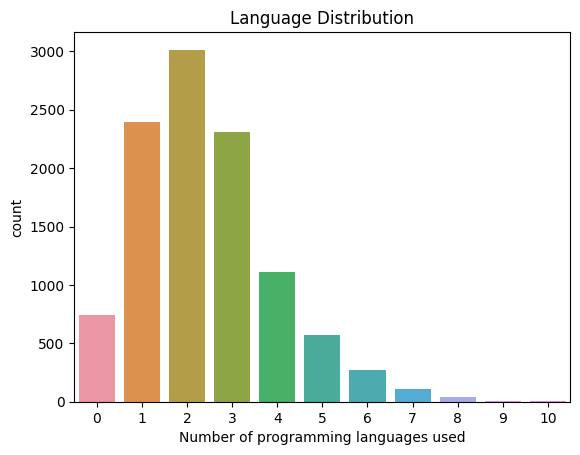

In [17]:
# language distribution countplot
language_countplot = sns.countplot(x='language_count', data=use_data)
language_countplot.set(title='Language Distribution', xlabel='Number of programming languages used', ylabel='count')
plt.show()

#### 4.1 Plot Description

Based on the distribution above, around 3000 people used 3 programming languages, which is the highest among all. Most people used 0-5 programming languages. Less than 500 people used 6-10 programming languages. Very few people used 9-10 programming languages. 

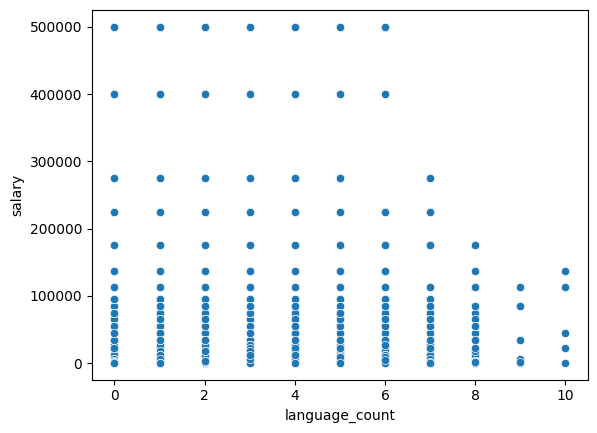

In [18]:
# Use a scatterplot to find the relationship between number of programming languages used and the salary earned

sns.scatterplot(x='language_count', y='salary', data= use_data)
plt.show()

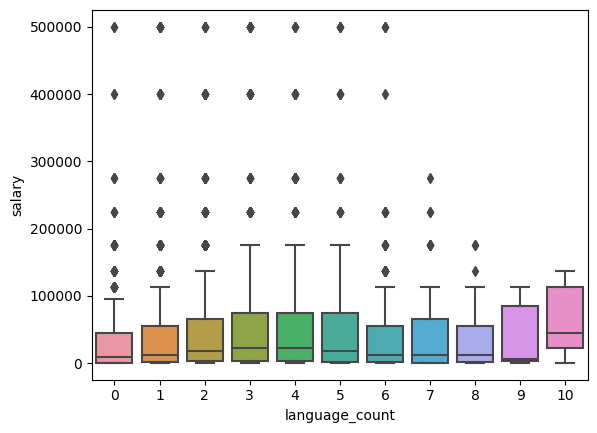

In [19]:
# Use a boxplot to detect potential outliers

sns.boxplot(x='language_count', y='salary', data= use_data)
plt.show()

#### 4.2 Outliers

The data points in black from the boxplot above are all outliers. For these outliers, the amount of salary lies in the range from roughly 100,000 to 500,000, regardless of the number of programming languages used. One possible explanation for this could be that there are other essential skills needed for a person to make a lot of money (beyond 100,000 in this case). It could be leadership, problem-solving skills, etc. And the number of programming languages used doesn't matter that much any more.

In [20]:
# Does programming languages predict salary? 
outcome_language, predictors_language = patsy.dmatrices('salary ~ language_count', use_data)
mod_language = sm.OLS(outcome_language, predictors_language)
res_language = mod_language.fit()
print(res_language.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     36.49
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.58e-09
Time:                        14:56:34   Log-Likelihood:            -1.3217e+05
No. Observations:               10575   AIC:                         2.644e+05
Df Residuals:                   10573   BIC:                         2.644e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.83e+04   1176.021     32.

#### 4.3 Major trend

Since the p-value here is less than 0.01, we reject the null hypothesis - the difference between data scientists’ salaries compared to the number of programming languages they used is due to chance alone. We can conclude that the relationship between data scientists’ salaries and the number of programming languages they used is statistically significant. The number of programming languages that data scientists use is a factor to the amount of salary they earned.

Putting aside the outliers, the median salary increases as the number of programming languages used increases from 0 to 4, and then decreases as the number of programming languages used increases from 4 to 9. Overall, people who use 3-5 programming languages have a higher salary on average in comparison to others. 

Mastering 3-5 programming languages could be ideal for data scientists - using less than 3 or more than 5 programming languages would lead to a lower salary on average (based on the boxplot above). While working as a data scientist, python is useful for data wrangling and visualizations, SQL is useful for database queries and Bash is useful for manipulating directories and organizing files. Thus, these three programming languages would be quite important to data scientists. Knowing less than three programming languages would likely decrease one's proficiency in data science related tasks and lead to lower salaries. As the number of programming languages used exceeds 5, the expertise in each programming language gets influenced since it's hard to distinguish and switch between those different programming languages, which as a result also leads to lower salaries. 

One exception - the median salary is the highest for those people who use 10 programming languages (25% and 75% quartiles are also the highest). It could be that people who use 10 programming languages are very good at coding and earn more salary as a result. 



#### 4.4 Concerns

The surveys only collected the number of programming languages each person used. The level of familiarity associated with each programming language is not recorded. It's possible that those people who know many programming languages only learned the basics, while those people who know 3-5 programming languages are very familiar with most of the languages. This assumption conforms with the major trend in the boxplot above. Thus more details are needed. 

# Ethics & Privacy

The data collection does not generate too many potential biases. In the survey questions that ask about personal information, people who composed the survey and collected the data did not store the data as an exact age, but as a range of ages. This method to store the data protects participants’ privacy. The concern we have is that some survey questions provide the option for people to choose. However, it does not let the participants specify what other means for them. Hence, there are some missing data in the unknown categories that cannot be included to be analyzed. Since in our research we care about the number of programming languages that people are proficient about, the open-ended answer can be categorized as one more programming language. 

Additionally, some data collection in different survey questions, such as gender, is not proportional in terms of the number of male, female, nonbinary, and not preferred to answer. Since our research question includes the relationship between salaries and gender, the disproportion of data can overlook the effect of being female to the amount of salary, and we decide to drop the answer that has no response. The other concern we have is that the survey is created within the platform of Kaggle. Hence, people who have access to this survey are limited to Kaggle users. For people who do not use Kaggle, their data is missing in the dataset because Kaggle does not necessarily represent all people who work in the industry. Furthermore, this survey was online for 3.5 weeks. The short period of time might exclude data from many Kaggle users who want to participate in the survey but fail to do so.

# Conclusion & Discussion

Firstly, we hypothesized that gender difference is significant in people’s salary. We first ran an exploratory data analysis on the distribution of salary across gender. The result indicated that binary gender has the highest salary while women has the lowest salary. Since the sample size among gender has a big difference, we then ran another EDA with a proportion plot for salary distribution across gender. The result indicated that most women are paid around the lowest salary, while men and binary gender are paid more. When comparing male and female workers’ salaries, we found that on average male are paid more than females. Finally, we ran the correlation between gender and salary and found that the difference in gender is significant (p < 0.01). The result indicated that gender is a factor in determining the salary of a data scientist. The results indicated a potential unfairness among gender in the data science field. Women in data science might be paid less because of gender stereotypes and less chances to get jobs.

Secondly, our hypothesis where data scientists locate plays an important role in their income level. Generally, our hypothesis was proven correct, with exceptions in Russia. Average and 75 quantile salaries of data scientists are higher within countries with higher GDP per capita, which may result from the extent to which the economy and technology industry has developed. For the United States and the United Kingdom, Brazil, Japan, and India, we reject the null hypothesis that where data scientists locate is not correlated with their salaries. For Russia, we fail to reject the null hypothesis that where data scientists locate is not correlated with their salaries. A limitation in our analysis is that our dataset is not equally distributed in the regions we select. There are gaps between the number of respondents from each country and the representativeness of each country may be different.

Thirdly, our hypothesis is that the difference between data scientists’ salaries compared to the number of programming languages they used is significant. Based on the boxplot of salary vs. language_count, we observed that the median salary increases as the number of programming languages used increases from 0 to 4, and then decreases as the number of programming languages used increases from 4 to 9. We inferred that Python, R and SQL could be essential programming languages for data scientists and mastering 3-5 programming languages could be ideal for them. While using less than 3 programming languages could be insufficient for accomplishing data science related tasks, using more than 5 programming languages could interfere with the expertise in each programming language. Then we performed OLS on salary and language_count and found that the difference between data scientists’ salaries compared to the number of programming languages they used is significant (with a p-value of 0.000, less than the 0.01 threshold). A limitation about the data we are analyzing is that people’s familiarities with each programming language were not recorded. Even though some people marked many programming languages in the surveys, it’s possible that they only knew a few basics while the other people who marked about 3-5 programming languages were very familiar with most of the programming languages they used. 





# Extra Credit
Our group members do not have that much prior knowledge to use Python proficiently. In order to figure out how to clean our dataset and create a regression model, we attended lectures on time. The assignments are enlightening to guide how we should clean our dataset and the questions within the assignments practice our thinking about how we should analyze the visualization we come up with. Additionally, we do not just practice our Python skill in the assignments, but also utilize self-learning to solve the errors we encountered during the process of programming. Moreover, the first checkpoint grade of our project is not high enough. To figure out where the points are deducted, we went to the office hour to discuss how we can improve our research. We added on the explanation about why we select the top six countries that have the most number of responses because when we analyze the relationship between salary and the resident country, the countries that have fewer responses can be considered as outliers that have the potential to affect the analysis. 


# Team Contributions

Bochen Pan: Organize and clean up all codes and words into one file. Providing coding assistance for data cleaning. Focus on finding the correlation between country difference VS salary including visulizations and regression.

Ruijie Huang: Background write-up. Data cleaning for gender, data analysis for gender vs. salary.

Rongyu Ma: Data cleaning for the programming languages used. Data visualization and OLS regression for salary vs. language_count. Conclusion for languages. 

Xiangwen Li: Overview, Ethics/Privacy, data cleaning description, extra credit, background/prior work.

Mingjie Ni: Data cleaning for country difference VS salary. Data visualization, OLS regression and anova test for country difference VS salary. Conclusion for country difference. 
